<a href="https://colab.research.google.com/github/Shaileshraajk/Wine-Quality/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [60]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [61]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Visualising the dataset and find Correlation between Features 
### This is done to eliminate features which are higly correlated to each other, in order to improve accuracy.

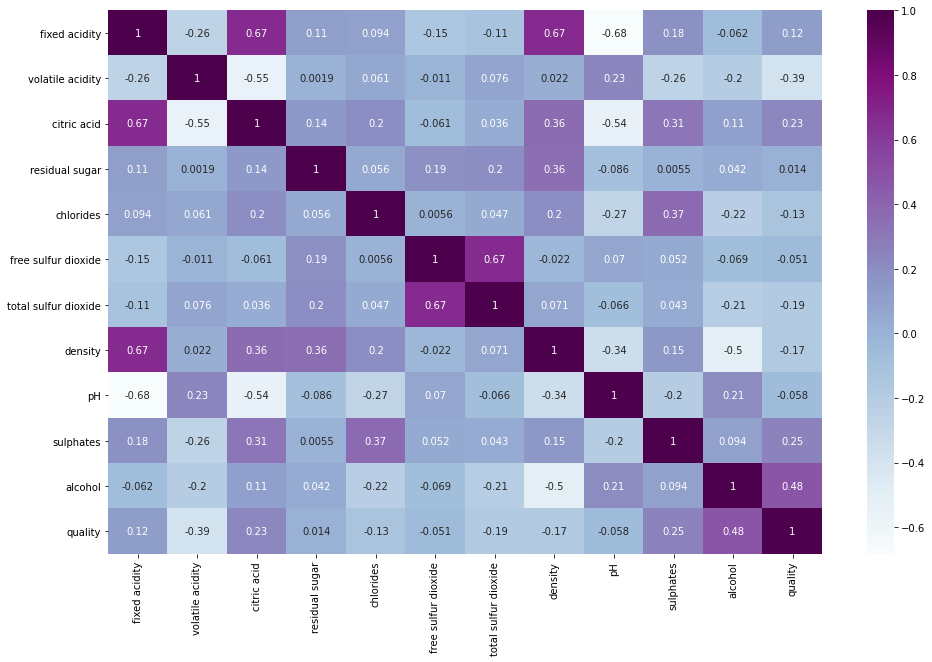

In [62]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=[16,10])
sb.heatmap(df.corr(),annot=True, cmap="BuPu")

In [63]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [64]:
df=df.drop('total sulfur dioxide',axis=1) # Dropping total sulfur dioxide based on high correlation value

# Checking for Null values in the Dataset

In [65]:
df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

# Separating features and target variable

In [72]:
#x=df[['fixed acidity', 'citric acid', 'sulphates', 'alcohol']]
#x=df.loc[:, ['fixed acidity', 'citric acid', 'sulphates', 'alcohol']]
x=df.iloc[:,0:10].values
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [73]:
y=df.iloc[:,10].values
y # target variable

array([5, 5, 5, ..., 6, 5, 6])

# Splitting dataset into training data and test data

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=  0)

In [75]:
x_test

array([[10.8  ,  0.47 ,  0.43 , ...,  3.17 ,  0.76 , 10.8  ],
       [ 8.1  ,  0.82 ,  0.   , ...,  3.36 ,  0.53 ,  9.6  ],
       [ 9.1  ,  0.29 ,  0.33 , ...,  3.26 ,  0.84 , 11.7  ],
       ...,
       [ 9.1  ,  0.34 ,  0.42 , ...,  3.18 ,  0.55 , 11.4  ],
       [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ],
       [ 8.2  ,  0.32 ,  0.42 , ...,  3.27 ,  0.55 , 12.3  ]])

# Nomalizing the data

This is done in this dataset because the data is unbalanced and the difference between the variable values is high.

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [77]:
x_test

array([[ 1.44653617, -0.29922497,  0.8557103 , ..., -0.93785052,
         0.72205872,  0.31519731],
       [-0.08433993,  1.83333604, -1.39006001, ...,  0.28055357,
        -0.85116573, -0.79369656],
       [ 0.48265122, -1.39597062,  0.33343814, ..., -0.36071174,
         1.26926723,  1.14686771],
       ...,
       [ 0.48265122, -1.09131905,  0.80348308, ..., -0.87372399,
        -0.7143636 ,  0.86964424],
       [ 0.48265122,  1.49821931, -1.18115114, ..., -0.16833214,
        -0.78276467, -0.70128874],
       [-0.02764082, -1.21317968,  0.80348308, ..., -0.29658521,
        -0.7143636 ,  1.70131464]])

# Training the Data using Linear Regression Model

In [78]:
from sklearn.linear_model import LinearRegression
Lin = LinearRegression()
Lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Testing the Data

In [79]:
y_pred=Lin.predict(x_test)
y_predl = list(Lin.predict(x_test))
test_df = {'Predicted':y_predl,'Actual':y_test}
pd.DataFrame(test_df).head(10)

,Predicted,Actual
0,5.796994,6
1,4.939255,5
2,6.637880,7
3,5.217474,6
4,5.918663,5
5,5.063335,6
6,5.305956,5
7,5.996896,6
8,4.742708,4
9,4.951674,5


# Evaluation of the Model - Finding Error value and R2 Score

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

mae=abs(y_pred-y_test).mean()
print("Mean Absolute Error: ",mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

Mean Absolute Error:  0.4800262618635327
Mean Squared Error:  0.396808516384474


In [82]:
r2_score = Lin.score(x_test,y_test)
r2_score = "{:.2%}".format(r2_score)
print("R2 Score: ",r2_score)

R2 Score:  30.68%
